# Analyzing Metric resistance to Random and Brute Force models

In this experiment, we compared the performance of Gemma, a brute force model, and a random model. The random model was tasked with extracting sentences at random from the transcript, while the brute force model considered every possible sentence from the transcript. The results, as illustrated in the graph, reveal that the brute force model suffers from significant negative impacts due to excessive generation of responses, which adversely affects its performance. In contrast, Gemma achieved the highest scores for the transcripts of two comedians, exceeding 60%.

#### Imports

In [20]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

from humor.bipartite_metric import bipartite_metric

In [21]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
model = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
transcript = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_transcripts.csv')

#### Experiment

In [22]:
# scores for gemma
gemma_metric = bipartite_metric(model, ground_truth)
gemma_metric.mean()

/tmp/ipykernel_3062712/512022961.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gemma_metric.mean()


score    28.171599
dtype: float64

In [23]:
# Create brute force dataframe
brute_sentences = []
for i in range(len(transcript['comedian'])):
    comedian = transcript['comedian'][i]
    trans = transcript['transcript'][i]
    sentences = nltk.sent_tokenize(trans)
    for sentence in sentences:
        brute_sentences.append({'comedian': comedian, 'sentence': sentence})

brute_model = pd.DataFrame(brute_sentences)
brute = bipartite_metric(brute_model, ground_truth)
brute.mean()

/tmp/ipykernel_3062712/3354477578.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  brute.mean()


score    1.502292
dtype: float64

In [24]:
#random model
random_model = pd.read_csv("/home/ada/humor/data/stand_up_dataset/random_gemma_quotes.csv")
random = bipartite_metric(random_model, ground_truth)
random.mean()

/tmp/ipykernel_3062712/4099960674.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  random.mean()


score    29.2532
dtype: float64

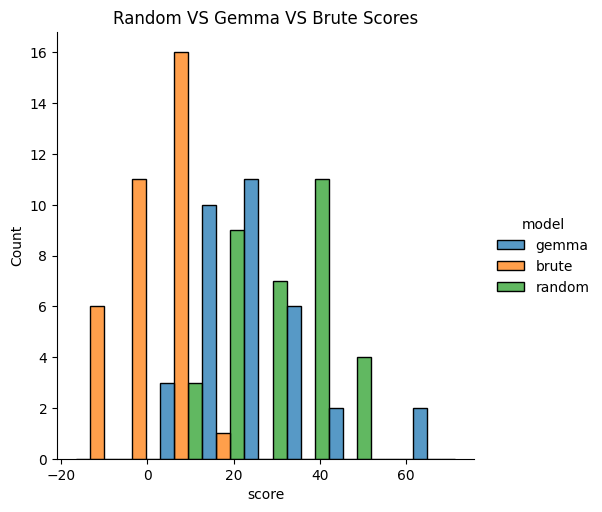

In [26]:
gemma = gemma_metric.assign(model="gemma") 
brute = brute.assign(model="brute") 
random = random.assign(model="random") 
df = pd.concat([gemma, brute, random]).reset_index(drop=True)
sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge")
plt.title("Random VS Gemma VS Brute Scores")
plt.show()